In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving profitability.csv to profitability.csv


In [ ]:
df = pd.read_csv('/content/profitability.csv', encoding='cp1252', sep=';')

In [ ]:
df.head()

ProduitFk  CustomerFk  StoreFk  TransactionDate  StatmentDate TotalAssets  \
0          1        3470        1             5559          5559   381164,00   
1          2        4566        2            18750         18750   240319,00   
2          3        5756        3            38945         38945   294791,00   
3          4        2350        4             9235          9235   190521,00   
4          5        3547        5             5628          5628   425666,00   

  TotalLiabilities     Equity    Budget ActualExpenses   Amount  Quantity  \
0         59281,00  321883,00  28886,00       20784,00  4636,00         7   
1         17565,00  222754,00  42222,00       17879,00  4721,00         8   
2         35691,00  259100,00  24755,00       10480,00   507,00         6   
3         25545,00  164976,00  28149,00       14191,00  4863,00         3   
4         24040,00  401626,00  47232,00       19283,00   854,00         5   

  UnitPrice TotalPrice  
0     87,18     610,26  
1     89,93     719,44  
2     17,97     107,82  
3     38,71     116,13  
4     25,72     128,60

In [ ]:
df.describe()

ProduitFk   CustomerFk     StoreFk  TransactionDate  StatmentDate  \
count  656.000000   656.000000  656.000000       656.000000    656.000000   
mean   333.887195  3453.121951  333.887195     17343.077744  17343.077744   
std    191.550395  2024.485682  191.550395      9302.574781   9302.574781   
min      1.000000    21.000000    1.000000      1424.000000   1424.000000   
25%    169.750000  1688.500000  169.750000      9530.250000   9530.250000   
50%    333.500000  3452.000000  333.500000     17379.500000  17379.500000   
75%    499.250000  5251.250000  499.250000     25237.500000  25237.500000   
max    665.000000  6996.000000  665.000000     39258.000000  39258.000000   

         Quantity  
count  656.000000  
mean     5.535061  
std      2.834141  
min      1.000000  
25%      3.000000  
50%      6.000000  
75%      8.000000  
max     10.000000

In [ ]:
#voir la colone cible
print(df['Equity'].value_counts())

Equity
435038,91    3
47450,00     3
338337,00    3
232487,00    3
30344,00     3
            ..
84833,00     1
369011,00    1
200493,00    1
204981,00    1
53220,00     1
Name: count, Length: 564, dtype: int64


In [ ]:
df.isnull().sum()

ProduitFk           0
CustomerFk          0
StoreFk             0
TransactionDate     0
StatmentDate        0
TotalAssets         0
TotalLiabilities    0
Equity              0
Budget              0
ActualExpenses      0
Amount              0
Quantity            0
UnitPrice           0
TotalPrice          0
dtype: int64

In [ ]:
# Vérifier le type de la colonne 'equity'
target_type = df['Equity'].dtype
print("Le type de la variable cible 'revenue' est :", target_type)

Le type de la variable cible 'revenue' est : object


In [ ]:
print(df.dtypes)

ProduitFk            int64
CustomerFk           int64
StoreFk              int64
TransactionDate      int64
StatmentDate         int64
TotalAssets         object
TotalLiabilities    object
Equity              object
Budget              object
ActualExpenses      object
Amount              object
Quantity             int64
UnitPrice           object
TotalPrice          object
dtype: object


In [ ]:
# Display correlation matrix for numerical columns
corr = df.corr(numeric_only=True)
corr

ProduitFk  CustomerFk   StoreFk  TransactionDate  \
ProduitFk         1.000000    0.012848  1.000000        -0.018070   
CustomerFk        0.012848    1.000000  0.012848         0.002916   
StoreFk           1.000000    0.012848  1.000000        -0.018070   
TransactionDate  -0.018070    0.002916 -0.018070         1.000000   
StatmentDate     -0.018070    0.002916 -0.018070         1.000000   
Quantity         -0.029954    0.058208 -0.029954        -0.040533   

                 StatmentDate  Quantity  
ProduitFk           -0.018070 -0.029954  
CustomerFk           0.002916  0.058208  
StoreFk             -0.018070 -0.029954  
TransactionDate      1.000000 -0.040533  
StatmentDate         1.000000 -0.040533  
Quantity            -0.040533  1.000000

In [ ]:
print(df.dtypes)


ProduitFk            int64
CustomerFk           int64
StoreFk              int64
TransactionDate      int64
StatmentDate         int64
TotalAssets         object
TotalLiabilities    object
Equity              object
Budget              object
ActualExpenses      object
Amount              object
Quantity             int64
UnitPrice           object
TotalPrice          object
dtype: object


In [ ]:
print(df.isna().sum())


ProduitFk           0
CustomerFk          0
StoreFk             0
TransactionDate     0
StatmentDate        0
TotalAssets         0
TotalLiabilities    0
Equity              0
Budget              0
ActualExpenses      0
Amount              0
Quantity            0
UnitPrice           0
TotalPrice          0
dtype: int64


In [ ]:
# Afficher les valeurs non numériques dans chaque colonne
for col in ['TotalAssets', 'TotalLiabilities', 'Equity', 'Budget', 'ActualExpenses', 'Amount', 'UnitPrice', 'TotalPrice']:
    print(f"Valeurs uniques dans {col} :")
    print(df[col].unique())  # Voir quelles valeurs posent problème


Valeurs uniques dans TotalAssets :
['381164,00' '240319,00' '294791,00' '190521,00' '425666,00' '344685,00'
 '234092,00' '303949,00' '444403,00' '390329,00' '366554,00' '364513,00'
 '162652,00' '388597,00' '280801,00' '457610,00' '143188,00' '423664,00'
 '301431,00' '417531,00' '354677,00' '176013,00' '193837,00' '312237,00'
 '77576,00' '269277,00' '197304,00' '186223,00' '115957,00' '214574,00'
 '274872,00' '245890,00' '215086,00' '405676,00' '377426,00' '151086,00'
 '340750,00' '185670,00' '54504,00' '187863,00' '105853,00' '393428,00'
 '155292,00' '211377,00' '213879,00' '438693,00' '489125,00' '673430,48'
 '462113,00' '255965,00' '66790,00' '51188,00' '313758,00' '246912,00'
 '463906,00' '483261,00' '491538,00' '209585,00' '467511,00' '481746,00'
 '484882,00' '367997,00' '136624,00' '100943,00' '210328,00' '488571,00'
 '254739,00' '136193,00' '198459,00' '479871,00' '397525,00' '369214,00'
 '322146,00' '317881,00' '150081,00' '277478,00' '296891,00' '239875,00'
 '120030,00' '291466

In [ ]:
cols_to_convert = ['TotalAssets', 'TotalLiabilities', 'Equity', 'Budget', 'ActualExpenses', 'Amount', 'UnitPrice', 'TotalPrice']

for col in cols_to_convert:
    df[col] = df[col].astype(str)  # Convertir en string pour éviter les erreurs
    df[col] = df[col].str.replace(',', '', regex=True)  # Supprimer les virgules
    df[col] = df[col].str.replace('[^0-9.-]', '', regex=True)  # Supprimer tout sauf chiffres et points
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convertir en float


In [ ]:
print(df.isna().sum())  # Voir s'il reste des valeurs NaN


ProduitFk           0
CustomerFk          0
StoreFk             0
TransactionDate     0
StatmentDate        0
TotalAssets         0
TotalLiabilities    0
Equity              0
Budget              0
ActualExpenses      0
Amount              0
Quantity            0
UnitPrice           0
TotalPrice          0
dtype: int64


In [ ]:
# Display correlation matrix for numerical columns
corr = df.corr(numeric_only=True)
corr

ProduitFk  CustomerFk   StoreFk  TransactionDate  \
ProduitFk          1.000000    0.012848  1.000000        -0.018070   
CustomerFk         0.012848    1.000000  0.012848         0.002916   
StoreFk            1.000000    0.012848  1.000000        -0.018070   
TransactionDate   -0.018070    0.002916 -0.018070         1.000000   
StatmentDate      -0.018070    0.002916 -0.018070         1.000000   
TotalAssets        0.003958    0.004545  0.003958        -0.003447   
TotalLiabilities   0.066178   -0.014694  0.066178         0.050307   
Equity            -0.016644    0.009235 -0.016644        -0.019245   
Budget             0.026632   -0.047342  0.026632        -0.048246   
ActualExpenses     0.013029   -0.040159  0.013029        -0.076021   
Amount            -0.023837    0.019045 -0.023837        -0.025648   
Quantity          -0.029954    0.058208 -0.029954        -0.040533   
UnitPrice          0.048532   -0.001145  0.048532        -0.049138   
TotalPrice         0.011271    0.026164  0.011271        -0.061011   

                  StatmentDate  TotalAssets  TotalLiabilities    Equity  \
ProduitFk            -0.018070     0.003958          0.066178 -0.016644   
CustomerFk            0.002916     0.004545         -0.014694  0.009235   
StoreFk              -0.018070     0.003958          0.066178 -0.016644   
TransactionDate       1.000000    -0.003447          0.050307 -0.019245   
StatmentDate          1.000000    -0.003447          0.050307 -0.019245   
TotalAssets          -0.003447     1.000000          0.220514  0.952388   
TotalLiabilities      0.050307     0.220514          1.000000 -0.087367   
Equity               -0.019245     0.952388         -0.087367  1.000000   
Budget               -0.048246     0.228222          0.354851  0.122168   
ActualExpenses       -0.076021     0.127132          0.408124  0.002270   
Amount               -0.025648    -0.052099         -0.019097 -0.047240   
Quantity             -0.040533    -0.049443         -0.033753 -0.039947   
UnitPrice            -0.049138     0.030434          0.001169  0.030717   
TotalPrice           -0.061011    -0.037959          0.006874 -0.040917   

                    Budget  ActualExpenses    Amount  Quantity  UnitPrice  \
ProduitFk         0.026632        0.013029 -0.023837 -0.029954   0.048532   
CustomerFk       -0.047342       -0.040159  0.019045  0.058208  -0.001145   
StoreFk           0.026632        0.013029 -0.023837 -0.029954   0.048532   
TransactionDate  -0.048246       -0.076021 -0.025648 -0.040533  -0.049138   
StatmentDate     -0.048246       -0.076021 -0.025648 -0.040533  -0.049138   
TotalAssets       0.228222        0.127132 -0.052099 -0.049443   0.030434   
TotalLiabilities  0.354851        0.408124 -0.019097 -0.033753   0.001169   
Equity            0.122168        0.002270 -0.047240 -0.039947   0.030717   
Budget            1.000000        0.537015 -0.070832 -0.019308   0.036675   
ActualExpenses    0.537015        1.000000 -0.029381 -0.032574  -0.009389   
Amount           -0.070832       -0.029381  1.000000 -0.002052   0.044740   
Quantity         -0.019308       -0.032574 -0.002052  1.000000   0.023510   
UnitPrice         0.036675       -0.009389  0.044740  0.023510   1.000000   
TotalPrice        0.038961       -0.004869  0.026204  0.643307   0.690276   

                  TotalPrice  
ProduitFk           0.011271  
CustomerFk          0.026164  
StoreFk             0.011271  
TransactionDate    -0.061011  
StatmentDate       -0.061011  
TotalAssets        -0.037959  
TotalLiabilities    0.006874  
Equity             -0.040917  
Budget              0.038961  
ActualExpenses     -0.004869  
Amount              0.026204  
Quantity            0.643307  
UnitPrice           0.690276  
TotalPrice          1.000000

Visualisation

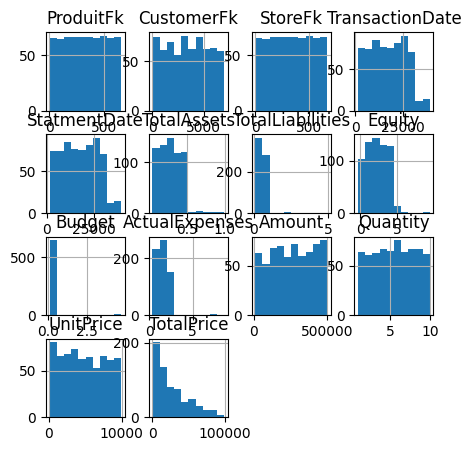

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(5,5))
plt.show()

In [ ]:
print(df['Equity'].describe())

count    6.560000e+02
mean     2.288226e+07
std      1.377475e+07
min     -3.034800e+06
25%      1.130080e+07
50%      2.290825e+07
75%      3.449088e+07
max      9.403821e+07
Name: Equity, dtype: float64


In [ ]:
# target
y = df['Equity']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))



In [ ]:
X = df[['TotalAssets','Budget']]


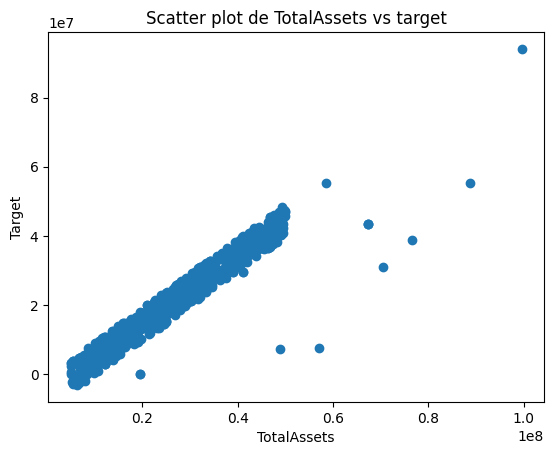

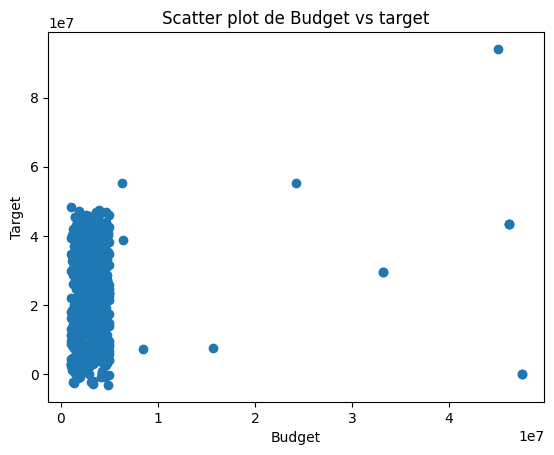

In [ ]:
import matplotlib.pyplot as plt

# Pour chaque feature, on trace un scatter plot
for col in X.columns:
    plt.scatter(X[col], y)
    plt.title(f'Scatter plot de {col} vs target')
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[ 0.68377215, -0.16014245],
       [-0.31813721,  0.12446718],
       [ 0.06935263, -0.24830399],
       ...,
       [ 0.05019582, -0.16878574],
       [ 0.33971771, -0.19644426],
       [-0.65689205,  0.14085742]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Séparer les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Initialisation du modèle
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prédictions
y_pred = model.predict(X_test)

In [ ]:
# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R² Score : {r2:.4f}")

MSE : 16206319623394.34
MAE : 2715409.90
R² Score : 0.9032


In [ ]:
import joblib
# Sauvegarde du modèle dans un fichier .pkl
joblib.dump(model, 'equity_model.pkl')

['equity_model.pkl']

In [ ]:
joblib.dump(scaler, 'scaler_regression.pkl')

['scaler_regression.pkl']

Erreur quadratique moyenne (MSE) : 14018689997342.934
Erreur absolue moyenne (MAE) : 2765722.1307150074
Score R² : 0.9162883782982071


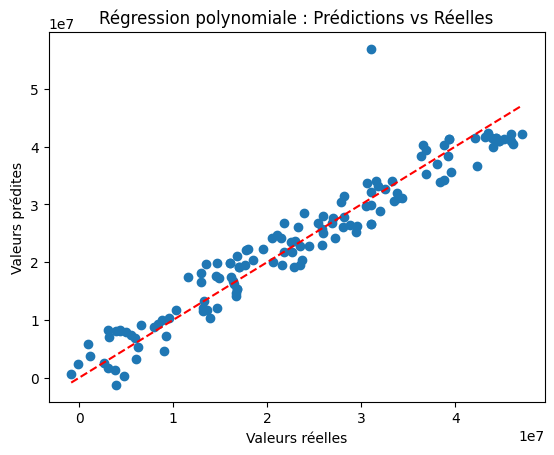

In [ ]:
# Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt



# Séparer en jeu d'entraînement et jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformation polynomiale des données
poly = PolynomialFeatures(degree=2)  # Tu peux ajuster le degré du polynôme
X_poly_train = poly.fit_transform(X_train)  # Transformation des données d'entraînement
X_poly_test = poly.transform(X_test)  # Transformation des données de test

# Création du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur les données transformées
model.fit(X_poly_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_poly_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Erreur absolue moyenne (MAE) : {mae}")
print(f"Score R² : {r2}")

# Visualisation des résultats (si pertinent)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Régression polynomiale : Prédictions vs Réelles')
plt.show()


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Transformation polynomiale
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Normalisation
scaler = StandardScaler()
X_poly_train_scaled = scaler.fit_transform(X_poly_train)
X_poly_test_scaled = scaler.transform(X_poly_test)

# Modèle SGD
model = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.00001)  # eta0 plus petit

# Entraînement
model.fit(X_poly_train_scaled, y_train)

# Prédictions
y_pred = model.predict(X_poly_test_scaled)

# Évaluation
print("MSE :", mean_squared_error(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("R² :", r2_score(y_test, y_pred))


MSE : 20877369819027.91
MAE : 2933582.2547295005
R² : 0.8753322539588119


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
